In [1]:
import joblib
import pandas as pd
import numpy as np
import math
from numpy import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [7]:
print("LOADING OBJECT DATA FOR MODEL TRAINING")
#Importing Object Data, deleting first incremental index row
Reflected_Signals_Object_1 = pd.read_excel('Object1.xlsx', header = None)
Reflected_Signals_Object_2 = pd.read_excel('Object2.xlsx', header = None)
print(Reflected_Signals_Object_1.shape)
print(Reflected_Signals_Object_2.shape)
Reflected_Signals_Object_1_Array = np.array(Reflected_Signals_Object_1)
Reflected_Signals_Object_1_Array = np.delete(Reflected_Signals_Object_1_Array, 0, 0)
Reflected_Signals_Object_2_Array = np.array(Reflected_Signals_Object_2)
Reflected_Signals_Object_2_Array = np.delete(Reflected_Signals_Object_2_Array, 0, 0)
print("\nLOADING DATA COMPLETE")

LOADING OBJECT DATA FOR MODEL TRAINING
(241, 16384)
(331, 16384)

LOADING DATA COMPLETE


In [8]:
#Features Definitions, Peak time, RMS energy, Average Energy, Maximum Loudness, Total Energy

#RMS Energy of the signal
def rms(spec, t):
       
        sum = 0.0
        for i in range(1, len(spec)):
            
            for j in range (1, len(t)):
                sum = sum + spec[i][j] ** 2.0

            sum = sum / (1.0 * len(spec))

        return math.sqrt(sum)

#Average Energy of the signal
def Average(lst):
    return sum(lst) / len(lst)   

#Maximum Loudness/ Energy of the signal
def loudness(spec):
    return np.amax(abs(spec[0]))

#Frequency at peak or Maximum Loudness/Energy
def peak_f(spec, f):
    return f[np.argmax(abs(spec[0]))]

#Time at peak or Maximum Loudness/Energy
def peak_t(spec, t):
    return t[np.argmax(abs(spec[0]))]

# Features extraction from object 1
def feature_extraction(data_array):
    sumenergy = []

    av0 = 0
    av = []

    rms0 = 0
    Rms = []

    loud0 = 0
    loud = []

    pkf0 = 0
    pkf = []

    pkt0 = 0
    pkt = []

    for i in range(data_array.shape[0]):

        spectrogram, f, t, im = plt.specgram(
            data_array[i],NFFT=256, Fs=2, noverlap=0);

        sumenergy.append(np.sum(spectrogram))

        rms0 = rms(spectrogram, t)
        Rms.append(rms0)

        loud0 = loudness(spectrogram)
        loud.append(loud0)

        pkf0 = peak_f(spectrogram, f)
        pkf.append(pkf0)

        pkt0 = peak_t(spectrogram, t)
        pkt.append(pkt0)

        av0 = Average(spectrogram)
        av.append(av0)



    return Rms, loud, pkf, pkt, av, sumenergy


CALCULATING SPECTROGRAMS AND EXTRACTING FEATURES FROM OBJECTS SIGNALS


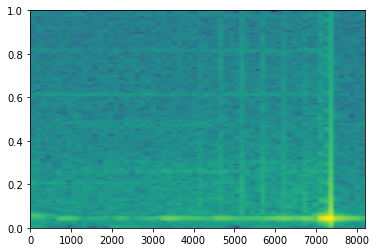

In [9]:
print("\nCALCULATING SPECTROGRAMS AND EXTRACTING FEATURES FROM OBJECTS SIGNALS")

#Feature extraction of object 1 signals
rms1 = []
loud1 = []
pkf1 = []
pkt1 = []
av1 = []
sum1 = []
rms1, loud1, pkf1, pkt1, av1, sum1  = feature_extraction(Reflected_Signals_Object_1_Array)




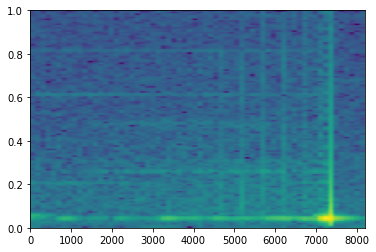

In [10]:
#Feature extraction of object 2 signals
rms2 = []
loud2 = []
pkf2 = []
pkt2 = []
av2 = []
sum2 = []
rms2, loud2, pkf2, pkt2, av2, sum2  = feature_extraction(
    Reflected_Signals_Object_2_Array)

In [11]:
print("\nCREATING DATA FRAME MODEL")
# Merging and creating data frame

pk_freq_obj1 = pd.DataFrame(pkf1, columns=["Peak Frequency"])
pk_freq_obj2 = pd.DataFrame(pkf2, columns=["Peak Frequency"])

pk_time_obj1 = pd.DataFrame(pkt1, columns=["Propagation Delay"])
pk_time_obj2 = pd.DataFrame(pkt2, columns=["Propagation Delay"])

sum_obj1 = pd.DataFrame(sum1, columns=["Total Energy"])
sum_obj2 = pd.DataFrame(sum2, columns=["Total Energy"])

rms_obj1 = pd.DataFrame(rms1, columns=["RMS Energy"])
rms_obj2 = pd.DataFrame(rms2, columns=["RMS Energy"])

avg_obj1 = pd.DataFrame(av1, columns=["Average Energy"])
avg_obj2 = pd.DataFrame(av2, columns=["Average Energy"])

loud_obj1 = pd.DataFrame(loud1, columns=["Maximum Loudness"])
loud_obj2 = pd.DataFrame(loud2, columns=["Maximum Loudness"])

#Checking sizes of object signal arrays
print(pk_freq_obj1.shape)
print(pk_freq_obj2.shape)
print(sum_obj1.shape)
print(sum_obj2.shape)
print(rms_obj1.shape)
print(rms_obj2.shape)
print(avg_obj1.shape)
print(avg_obj2.shape)
print(pk_time_obj1.shape)
print(pk_time_obj2.shape)
print(loud_obj1.shape)
print(loud_obj2.shape)

#Targets Assignment
sum_obj1["Target"] = str('Object 1') 
sum_obj2["Target"] = str('Object 2')

#Accumulation of data Frames of features
pk_f = [pk_freq_obj1, pk_freq_obj2]

rootms = [rms_obj1, rms_obj2]

max_sum = [sum_obj1, sum_obj2]

frame_avg = [avg_obj1, avg_obj2]

pk_t = [pk_time_obj1, pk_time_obj2]

L = [loud_obj1, loud_obj2]

final_pkfreq = pd.concat(pk_f)
final_rms = pd. concat(rootms)
final_max_sum = pd.concat(max_sum)
final_avg = pd.concat(frame_avg)
final_pkt = pd.concat(pk_t)
final_l = pd.concat(L)
print(final_max_sum.shape)
print(final_pkfreq.shape)
print(final_rms.shape)
print(final_avg.shape)



CREATING DATA FRAME MODEL
(240, 1)
(330, 1)
(240, 1)
(330, 1)
(240, 1)
(330, 1)
(240, 1)
(330, 1)
(240, 1)
(330, 1)
(240, 1)
(330, 1)
(570, 2)
(570, 1)
(570, 1)
(570, 1)


In [13]:

# Final Data Frame :
# Peak freq, Propagation time
# RMS energy, Average Energy
# Maximum Loudness, Total Energy
final_data_frame1 = pd.concat([final_pkfreq, final_pkt], axis = 1)
final_data_frame2 = pd.concat([final_data_frame1, final_rms], axis = 1)
final_data_frame3 = pd.concat([final_data_frame2, final_avg], axis = 1)
final_data_frame4 = pd.concat([final_data_frame3, final_l], axis = 1)
final_data_frame = pd.concat([final_data_frame4, final_max_sum], axis =1)
final_data_frame.isnull().values.any()
print(final_data_frame.shape)
print("\nDATA FRAME COMPLETE")
final_data_frame

(570, 7)

DATA FRAME COMPLETE


,Peak Frequency,Propagation Delay,RMS Energy,Average Energy,Maximum Loudness,Total Energy,Target
0,0.109375,1856.0,13.915572,7.512960e+05,222278.404857,9.691718e+07,Object 1
1,0.000000,64.0,7.133544,7.336886e+05,4750.056230,9.464583e+07,Object 1
2,0.398438,6592.0,12.543023,7.290013e+05,3842.053271,9.404116e+07,Object 1
3,0.007812,192.0,12.719327,7.054604e+05,791.033739,9.100440e+07,Object 1
4,0.000000,64.0,8.115377,7.317989e+05,3805.260458,9.440205e+07,Object 1
...,...,...,...,...,...,...,...
325,0.078125,1344.0,30.671251,1.346935e+07,32640.627217,1.737546e+09,Object 2
326,0.398438,6592.0,22.840809,1.244634e+07,15160.152842,1.605577e+09,Object 2
327,0.398438,6592.0,11.344387,1.397758e+07,223388.196027,1.803108e+09,Object 2
328,0.492188,8128.0,2.709756,1.072344e+07,8748.206975,1.383324e+09,Object 2


In [14]:
# Splitting training and testing of data frame, 20% for testing
print("\nSPLITTING TRAINING AND TESTING DATA, USING 20% FOR TESTING")
X = final_data_frame.drop("Target", axis =1)
y = final_data_frame["Target"]
np.random.seed(42)

print(X.shape)

print(y.shape)


SPLITTING TRAINING AND TESTING DATA, USING 20% FOR TESTING
(570, 6)
(570,)


In [15]:
# Split in train and test set,20 % data to be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2)

# Save models in the dictionary
models = {"Random Forest": RandomForestClassifier(),
         "Decision Tree": tree.DecisionTreeClassifier()}


In [16]:
# Create a function to fit and score models
# fits and evaluates the machine learning models
# X_train: training data(no labels)
# X_test: testing data(no labels)
# y_train: training labels
# y_test: testing labels
def modelfitWithscore(models, X_train, X_test, y_train, y_test):
    # Randomizing the data frame
    np.random.seed(42)
    #Dictionary of model scores
    model_scores = {}
    #Each model turn
    for name, model in models.items():
        # Fitting the model
        model.fit(X_train, y_train)
        # Score appending to model
        model_scores[name] = model.score(X_test, y_test)*100
    return model_scores

#Classification process with plotting accuracies and classification results
print("\nMODEL FIT COMPLETE")
model_scores = modelfitWithscore(models, X_train,X_test, y_train, y_test)

print("\nTHE MODEL CONFIDENCES ARE AS FOLLOWS:")
print(model_scores)


MODEL FIT COMPLETE

THE MODEL CONFIDENCES ARE AS FOLLOWS:
{'Random Forest': 87.71929824561403, 'Decision Tree': 82.45614035087719}


<AxesSubplot:>

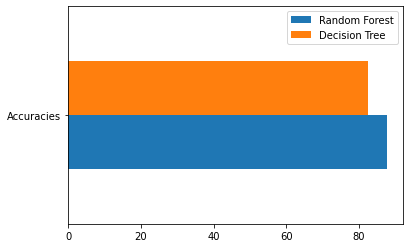

In [17]:
#Bar Graph: Decision Tree and Random Forest confidence
plotdata = pd.DataFrame(
    {"Random Forest": list(model_scores.items())[0][1], "Decision Tree": list(model_scores.items())[1][1]},
    index=["Accuracies"])
plotdata.plot(kind="barh")

In [18]:

# Trained Model Saved to local machine
trained_model1 = 'randomForest.sav'
trained_model2 = 'decisionTree.sav'
print("\nTRAINED MODELS SAVED TO LOCAL MACHINE")
joblib.dump(models["Random Forest"], trained_model1)
joblib.dump(models["Decision Tree"], trained_model2)


TRAINED MODELS SAVED TO LOCAL MACHINE


['decisionTree.sav']

In [40]:
#Testing classifier with one file
#Read test file, save into array
#Save into array for feature extraction
test_data = pd.read_excel('test_obj.xlsx')
array_test = np.array(test_data)
print(array_test.shape)
print("\nLOADED TEST DATA ARRAY FOR OBJECT DISCRIMINATION AND CLASSIFIER ASSESSMENT")

(1, 16384)

LOADED TEST DATA ARRAY FOR OBJECT DISCRIMINATION AND CLASSIFIER ASSESSMENT



SPECTROGRAMS CALCULATED AND FEATURES EXTRACTED OF TEST SIGNAL

FEATURES: Peak Frequency, Propagation Delay, RMS Energy, Average Energy and Maximum Loudness


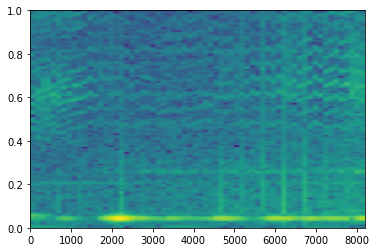

In [41]:
RMS = []
LOUD = []
PKF = []
PKT = []
AV = []
SUM = []
RMS, LOUD, PKF, PKT, AV, SUM = feature_extraction(array_test)
print("\nSPECTROGRAMS CALCULATED AND FEATURES EXTRACTED OF TEST SIGNAL")
print("\nFEATURES: Peak Frequency, Propagation Delay, RMS Energy, Average Energy and Maximum Loudness")

In [42]:
#Data frame for the features of test file
peak_freq = pd.DataFrame([PKF], columns=["Peak Frequency"])
peak_time = pd.DataFrame([PKT], columns= ["Propagation Delay"])
rms_obj = pd.DataFrame([RMS], columns=["RMS Energy"])
avg_obj = pd.DataFrame([AV], columns=["Average Energy"])
loud_obj = pd.DataFrame([LOUD], columns=["Maximum Loudness"])
sum_obj = pd.DataFrame([SUM], columns=["Total Energy"])
frames1 = [peak_freq, peak_time]
final_data_frame1 = pd.concat(frames1, axis =1)
final_data_frame2 = pd.concat([final_data_frame1,rms_obj], axis =1)
final_data_frame3 = pd.concat([final_data_frame2,avg_obj], axis =1)
final_data_frame0 = pd.concat([final_data_frame3,loud_obj], axis =1)
final_data_frame01 = pd.concat([final_data_frame0,sum_obj], axis =1)
print("\nFINAL DATA FRAME OF TEST SIGNAL MADE SUCCESSFULLY.\n")
final_data_frame01


FINAL DATA FRAME OF TEST SIGNAL MADE SUCCESSFULLY.



,Peak Frequency,Propagation Delay,RMS Energy,Average Energy,Maximum Loudness,Total Energy
0,0.007812,192.0,71.22291,705022.15699,1238.579512,9.094786e+07


In [43]:
#Classifier Analysis
print("\nUSING SAVED MODEL RANDOM FOREST")
loaded_model = joblib.load(trained_model1)
value = loaded_model.predict(final_data_frame01)
print("\nThe object is:")
print(value)


USING SAVED MODEL RANDOM FOREST

The object is:
['Object 1']


In [44]:

print("\nSTARTING CLASSIFIER ASSESSMENT")
#Confusion Matrix of the classification
import pandas as pd
y_actu = y_test
y_pred = models["Random Forest"].predict(X_test)

#series to array
w=y_actu.tolist()
y_actu0=np.array(w)

y_actu = pd.Series(y_actu0, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')


STARTING CLASSIFIER ASSESSMENT


In [45]:
#data frame of Confusion Matrix
df_confusion = pd.crosstab(y_actu, y_pred)

# Confusion Matrix
print("\nConfusion Matrix of the classifier:\n")
print(df_confusion)


Confusion Matrix of the classifier:

Predicted  Object 1  Object 2
Actual                       
Object 1         48         5
Object 2          9        52


In [46]:
#confusion matrix with sum of rows and columns
df_confusion_all = pd.crosstab(y_actu, y_pred,
                               rownames=['Actual'],
                               colnames=['Predicted'],
                               margins=True)

print("\nConfusion Matrix of the classifier with sums:\n")
print(df_confusion_all)


Confusion Matrix of the classifier with sums:

Predicted  Object 1  Object 2  All
Actual                            
Object 1         48         5   53
Object 2          9        52   61
All              57        57  114


In [47]:
#confusion matrix normalized
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print("\nNormalized Confusion Matrix of the classifier:\n")
print(df_conf_norm)


Normalized Confusion Matrix of the classifier:

Predicted  Object 1  Object 2
Actual                       
Object 1   0.905660  0.081967
Object 2   0.169811  0.852459


In [48]:
#confusion matrix diagram block
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

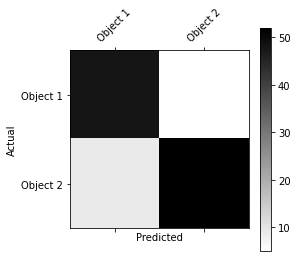

In [49]:
plot_confusion_matrix(df_confusion)

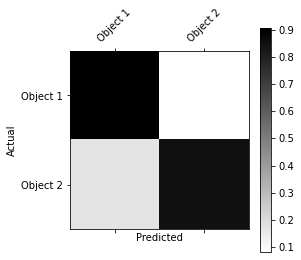

In [50]:
plot_confusion_matrix(df_conf_norm)

In [51]:
#true negative
TN = df_confusion.iat[0,0]
# true positive
TP = df_confusion.iat[1,1]
# false positive
FP = df_confusion.iat[0,1]
# false negative
FN = df_confusion.iat[1,0]

#Classifier Assessment rates

#Sensitivity/ Recall/ Hit rate
TPR = TP/(TP + FN)
print("\nTrue Positive Rate/Sensitivity/Recall/Hit Rate:")
print(TPR)

#Specificity/ Selectivity
TNR = TN/(TN + FP)
print("\nTrue Negative Rate/Specificty/Selectivity:")
print(TNR)

#False Discovery Rate
FDR = FP/(FP + TP)
print("\nFalse Discovery Rate:")
print(FDR)

#Negative Predictive Value
NPV = TN/(TN + FN)
print("\nNegative Predictive Value:")
print(NPV)


True Positive Rate/Sensitivity/Recall/Hit Rate:
0.8524590163934426

True Negative Rate/Specificty/Selectivity:
0.9056603773584906

False Discovery Rate:
0.08771929824561403

Negative Predictive Value:
0.8421052631578947



Recall of the classifier is:
0.8524590163934426

Precision of the classifier is:
0.9122807017543859

F1-Score of the classifier is:
0.8813559322033898


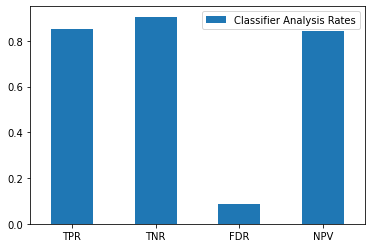

In [52]:

ACCURACY = (TP + TN)/(TP + TN + FP + FN)

CLASSIIFIER_ANALYSIS = {}
CLASSIIFIER_ANALYSIS["TPR"] = TPR
CLASSIIFIER_ANALYSIS["TNR"] = TNR
CLASSIIFIER_ANALYSIS["FDR"] = FDR
CLASSIIFIER_ANALYSIS["NPV"] = NPV

CA_DATAFRAME = pd.DataFrame(CLASSIIFIER_ANALYSIS, index=["Classifier Analysis Rates"])
CA_DATAFRAME.T.plot.bar(rot = 0);

#Recall
RECALL = TPR

#Precision
PRECISION = TP / (TP + FP)

# F1 score
F1_SCORE= 2/((1/RECALL)+(1/PRECISION))
print("\nRecall of the classifier is:")
print(RECALL)
print("\nPrecision of the classifier is:")
print(PRECISION)
print("\nF1-Score of the classifier is:")
print(F1_SCORE)



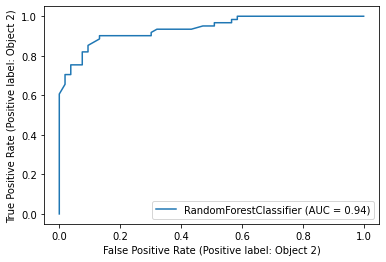

In [53]:
# Plotting ROC curve
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

metrics.plot_roc_curve(models["Random Forest"], X_test, y_test)  
plt.show()